In [68]:
import sys
sys.path.append('./../../')

import os
import torch
import torch.nn.functional as F
from torch import nn, optim
from torch.optim.lr_scheduler import MultiStepLR
from torch.utils.tensorboard import SummaryWriter
import argparse
from config_reader import ConfigReader
from modules.dvae.model import DVAE
from modules.transformer_gen.ar_cond_2stream.generator import LatentGenerator as LatentGenerator2s
from modules.transformer_gen.ar_cond_1stream.generator import LatentGenerator as LatentGenerator1s
from datasets.mnist_loader import MNISTData
from datasets.cub_loader import CUBData
from datasets.cub_text_indexer import TextIndexer
from utilities.model_loading import *

from modules.common_utils import latent_to_img
from notebooks.utils import show

In [71]:
n = 6

data_source = CUBData(
    img_type=CONFIG.dataset_type,
    root_path=CONFIG.root_path,
    batch_size=CONFIG.BATCH_SIZE,
    description_len=CONFIG.cond_seq_size,
    prct_train_split=0.99,
    custom_transform_version=CONFIG.custom_transform_version)
train_loader = data_source.get_train_loader(batch_size=n)

ti = TextIndexer(vocab_file_path="/u/82/sukhoba1/unix/Desktop/TA-VQVAE/data/CUB/vocab.json")

+ this bird has a very long reddish brown throat a white crown and a very long bill with brown and white feathers covering the rest of its body
+ a small bird with a brown wing and tail and pointed beak
+ small bird with a beautiful yellow throat breast and belly it has a black band that goes across its throat and brown cream speckled sides its tarsus are pink and it has a small beak
+ a small bird with a yellow head face neck throat belly white tarsus grey rump and grey wings and tail with white wingbars and brown tips
+ this particular bird has a black belly and gray breasts and a red bill with a black tip
+ this bird has wings that are black and has a white belly


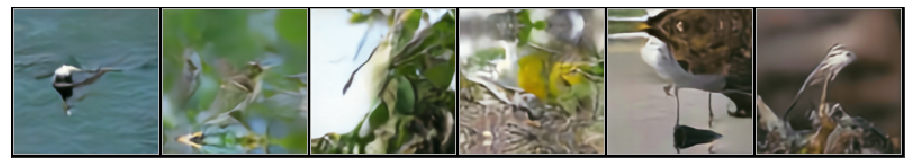

In [80]:
folder_path = '/u/82/sukhoba1/unix/Desktop/TA-VQVAE/configs/finished/'
config_path = folder_path + 'Tr2s2s_cub_v512_ds2_nb12_cnb16_remote_continue.yaml'
CONFIG = ConfigReader(config_path=config_path)


dvae = define_DVAE(CONFIG, eval=True, load=True, compound_config=True)
G = define_LatentGenerator2s(CONFIG, eval=True, load=True)


img_tensor, token_ids_tensor = next(iter(train_loader))
img_tensor = img_tensor.to(CONFIG.DEVICE)
token_ids_tensor = token_ids_tensor.permute(1, 0).to(CONFIG.DEVICE)


tokens = token_ids_tensor.T.tolist()
tokens_processed = []
for sent_tokens in tokens:
    sent_text = []
    for t in sent_tokens:
        if t != 0:
            sent_text.append(t)
    tokens_processed.append(sent_text)
for sentence_tokens in tokens_processed:
    print('+', ti.ids2text(sentence_tokens))


with torch.no_grad():
    gen_lat = G.sample(token_ids_tensor)
gen_img = latent_to_img(gen_lat, dvae, CONFIG.hidden_height, CONFIG.hidden_width)
show(gen_img, figsize=(16,16), plot_grid=True)

+ this bird has wings that are black and had a long black bill
+ this brown black bird has a very large wing span and a small head with a long pointed tail
+ a small bird with black crown and blueish gray plumage
+ this bird has wings that are black and has a long neck
+ this bird has a white belly with a black back and head
+ this is a very small bird with a yellow belly and a dark colored head and beak


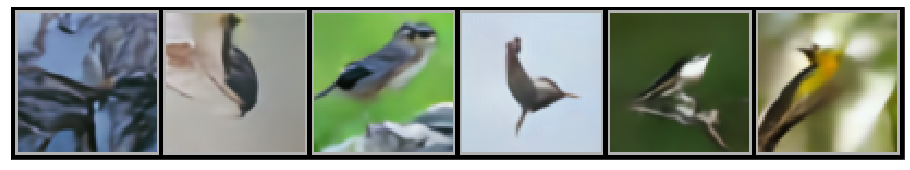

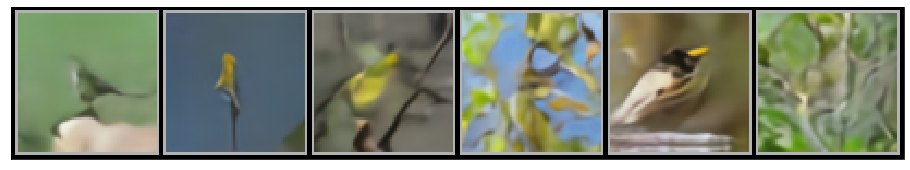

In [79]:
folder_path = '/u/82/sukhoba1/unix/Desktop/TA-VQVAE/configs/'
config_path = folder_path + 'Tr2s2s_cub64_v512_ds2_nb14_cnb8.yaml'
CONFIG = ConfigReader(config_path=config_path)


dvae = define_DVAE(CONFIG, eval=True, load=True, compound_config=True)
G = define_LatentGenerator2s(CONFIG, eval=True, load=True)


img_tensor, token_ids_tensor = next(iter(train_loader))
img_tensor = img_tensor.to(CONFIG.DEVICE)
token_ids_tensor = token_ids_tensor.permute(1, 0).to(CONFIG.DEVICE)


tokens = token_ids_tensor.T.tolist()
tokens_processed = []
for sent_tokens in tokens:
    sent_text = []
    for t in sent_tokens:
        if t != 0:
            sent_text.append(t)
    tokens_processed.append(sent_text)
for sentence_tokens in tokens_processed:
    print('+', ti.ids2text(sentence_tokens))


with torch.no_grad():
    gen_lat = G.sample(token_ids_tensor)
gen_img = latent_to_img(gen_lat, dvae, CONFIG.hidden_height, CONFIG.hidden_width)
show(gen_img, figsize=(16,16), plot_grid=True)


custom_txt_tensor = torch.zeros(CONFIG.cond_seq_size, n, dtype=torch.long)
_txt_tensor = torch.LongTensor(ti.text2ids('the bird has a brown bill and yellow breast'))
for i in range(n):
    custom_txt_tensor[0:_txt_tensor.size(0), i] = _txt_tensor
custom_txt_tensor = custom_txt_tensor.to(CONFIG.DEVICE)

with torch.no_grad():
    gen_lat = G.sample(custom_txt_tensor)
gen_img = latent_to_img(gen_lat, dvae, CONFIG.hidden_height, CONFIG.hidden_width)
show(gen_img, figsize=(16,16), plot_grid=True)

+ a dark blue grey bird with a black crown and long black pointed beak and a dark orange undertail
+ this small bird has brow and white feathers in a unique striping pattern covering its entire body
+ a multi colored bird with a white yellow and black wing
+ this particular bird has a gray beak and a black and white crown
+ red black and white bird with a wide frame and pointy beak
+ a white bird with a black crown and an orange pointed beak


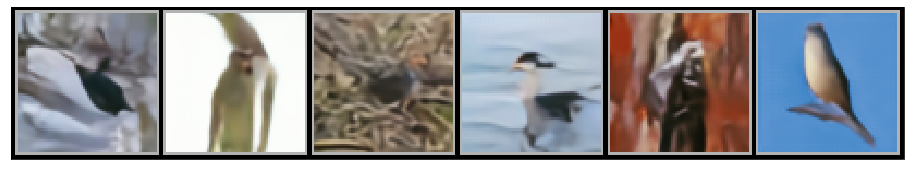

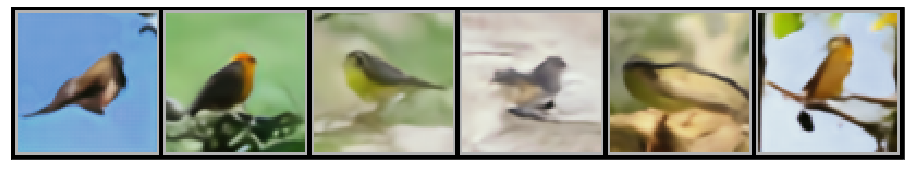

In [77]:
folder_path = '/u/82/sukhoba1/unix/Desktop/TA-VQVAE/configs/'
config_path = folder_path + 'Tr2s2s_cub64_v512_ds2_nb14_cnb8.yaml'
CONFIG = ConfigReader(config_path=config_path)


dvae = define_DVAE(CONFIG, eval=True, load=True, compound_config=True)
G = define_LatentGenerator2s(CONFIG, eval=True, load=True)


img_tensor, token_ids_tensor = next(iter(train_loader))
img_tensor = img_tensor.to(CONFIG.DEVICE)
token_ids_tensor = token_ids_tensor.permute(1, 0).to(CONFIG.DEVICE)


tokens = token_ids_tensor.T.tolist()
tokens_processed = []
for sent_tokens in tokens:
    sent_text = []
    for t in sent_tokens:
        if t != 0:
            sent_text.append(t)
    tokens_processed.append(sent_text)
for sentence_tokens in tokens_processed:
    print('+', ti.ids2text(sentence_tokens))


with torch.no_grad():
    gen_lat = G.sample(token_ids_tensor)
gen_img = latent_to_img(gen_lat, dvae, CONFIG.hidden_height, CONFIG.hidden_width)
show(gen_img, figsize=(16,16), plot_grid=True)


custom_txt_tensor = torch.zeros(CONFIG.cond_seq_size, n, dtype=torch.long)
_txt_tensor = torch.LongTensor(ti.text2ids('the bird has a brown bill and yellow breast'))
for i in range(n):
    custom_txt_tensor[0:_txt_tensor.size(0), i] = _txt_tensor
custom_txt_tensor = custom_txt_tensor.to(CONFIG.DEVICE)

with torch.no_grad():
    gen_lat = G.sample(custom_txt_tensor)
gen_img = latent_to_img(gen_lat, dvae, CONFIG.hidden_height, CONFIG.hidden_width)
show(gen_img, figsize=(16,16), plot_grid=True)

In [82]:
folder_path = '/u/82/sukhoba1/unix/Desktop/TA-VQVAE/configs/'
config_path = folder_path + 'Tr2s2s_cub64_v512_ds2_nb14_cnb8.yaml'
CONFIG = ConfigReader(config_path=config_path)


dvae = define_DVAE(CONFIG, eval=True, load=True, compound_config=True)
G = define_LatentGenerator2s(CONFIG, eval=True, load=True)

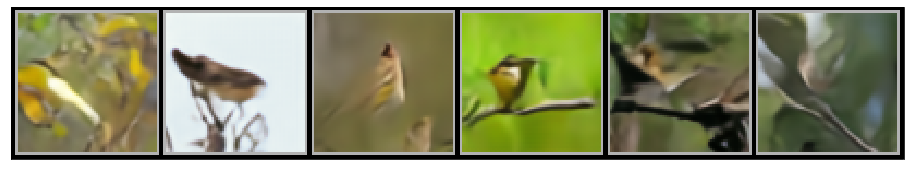

In [86]:
custom_txt_tensor = torch.zeros(CONFIG.cond_seq_size, n, dtype=torch.long)
_txt_tensor = torch.LongTensor(ti.text2ids('the bird has yellow breast and red crown'))
for i in range(n):
    custom_txt_tensor[0:_txt_tensor.size(0), i] = _txt_tensor
custom_txt_tensor = custom_txt_tensor.to(CONFIG.DEVICE)

with torch.no_grad():
    gen_lat = G.sample(custom_txt_tensor)
gen_img = latent_to_img(gen_lat, dvae, CONFIG.hidden_height, CONFIG.hidden_width)
show(gen_img, figsize=(16,16), plot_grid=True)